### __Introduction__

Two datasets containing information from red and white variants of the Portuguese "Vinho Verde" wine were provided for the challenge. The red and white wine datasets each contain results from physicochemical tests of the wines: 

- fixed acidity (g / dm^3)
<br>
- volatile acidity (g / dm^3)
<br>
- citric acid (g / dm^3)
<br>
- residual sugar (g / dm^3)
<br>
- chlorides (g / dm^3)
<br>
- free sulfur dioxide (mg / dm^3)
<br>
- total sulphur dioxide (mg / dm^3)
<br>
- density (g / cm^3)
<br>
- pH (0 to 14)
<br>
- sulphates (g / dm^3)
<br>
- alcohol (% by volume)

and a rank of wine quality from 1 (very poor) to 10 (excellent) based on a sensory analysis carried out by wine experts.  

The aims of the challenge were to:

(i) Determine the factors that predict wine quality 

(ii) Determine the factors that predict wine type (red or white)




Reference: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

### __Exploratory Data Analysis__

As an initial step, exploratory analyses of the datasets was carried out to investigate the structure and shape of the data. This is fundamental as datasets often require pre-processing/cleaning steps due to missing variables, etc. Even with metadata provided, this exploration should be carried out as a quality control step. Furthermore,a basic understanding of the datasets will aid the interpretation of prediction results from the final models.  

In [1]:
#import libraries for the challenge 
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

#import required sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler 


pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x))
np.set_printoptions(suppress=True)

In [2]:
#load the red and white wine datasets 

df_red = pd.read_csv("winequality-red.csv", sep=';')
df_white = pd.read_csv("winequality-white.csv", sep=';')

In [3]:
#check for missing data in the red wine dataframe 

rw_null = df_red.isnull().sum()
ww_null = df_white.isnull().sum() 
pd.concat([rw_null, ww_null], axis=0, keys=['Red Wine Null', 'White Wine Null']).T

Red Wine Null    fixed acidity           0
                 volatile acidity        0
                 citric acid             0
                 residual sugar          0
                 chlorides               0
                 free sulfur dioxide     0
                 total sulfur dioxide    0
                 density                 0
                 pH                      0
                 sulphates               0
                 alcohol                 0
                 quality                 0
White Wine Null  fixed acidity           0
                 volatile acidity        0
                 citric acid             0
                 residual sugar          0
                 chlorides               0
                 free sulfur dioxide     0
                 total sulfur dioxide    0
                 density                 0
                 pH                      0
                 sulphates               0
                 alcohol                 0
           

In [4]:
#rename columns to contain underscores rather than spaces

df_red.rename(columns={'fixed acidity':'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_white.rename(columns={'fixed acidity':'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [5]:
# descriptive statistics of the red and white wine datasets 

rw = df_red.describe()
ww = df_white.describe() 
pd.concat([rw, ww], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Red Wine Statistics                                 \
                                   count    mean     std    min     25%   
fixed_acidity                 1,599.0000  8.3196  1.7411 4.6000  7.1000   
volatile_acidity              1,599.0000  0.5278  0.1791 0.1200  0.3900   
citric_acid                   1,599.0000  0.2710  0.1948 0.0000  0.0900   
residual_sugar                1,599.0000  2.5388  1.4099 0.9000  1.9000   
chlorides                     1,599.0000  0.0875  0.0471 0.0120  0.0700   
free_sulfur_dioxide           1,599.0000 15.8749 10.4602 1.0000  7.0000   
total_sulfur_dioxide          1,599.0000 46.4678 32.8953 6.0000 22.0000   
density                       1,599.0000  0.9967  0.0019 0.9901  0.9956   
pH                            1,599.0000  3.3111  0.1544 2.7400  3.2100   
sulphates                     1,599.0000  0.6581  0.1695 0.3300  0.5500   
alcohol                       1,599.0000 10.4230  1.0657 8.4000  9.5000   
quality                       1,599.0000  5.6360  0.8076 3.0000  5.0000   

                                              White Wine Statistics           \
                         50%     75%      max                 count     mean   
fixed_acidity         7.9000  9.2000  15.9000            4,898.0000   6.8548   
volatile_acidity      0.5200  0.6400   1.5800            4,898.0000   0.2782   
citric_acid           0.2600  0.4200   1.0000            4,898.0000   0.3342   
residual_sugar        2.2000  2.6000  15.5000            4,898.0000   6.3914   
chlorides             0.0790  0.0900   0.6110            4,898.0000   0.0458   
free_sulfur_dioxide  14.0000 21.0000  72.0000            4,898.0000  35.3081   
total_sulfur_dioxide 38.0000 62.0000 289.0000            4,898.0000 138.3607   
density               0.9968  0.9978   1.0037            4,898.0000   0.9940   
pH                    3.3100  3.4000   4.0100            4,898.0000   3.1883   
sulphates             0.6200  0.7300   2.0000            4,898.0000   0.4898   
alcohol              10.2000 11.1000  14.9000            4,898.0000  10.5143   
quality               6.0000  6.0000   8.0000            4,898.0000   5.8779   

                                                                         
                         std    min      25%      50%      75%      max  
fixed_acidity         0.8439 3.8000   6.3000   6.8000   7.3000  14.2000  
volatile_acidity      0.1008 0.0800   0.2100   0.2600   0.3200   1.1000  
citric_acid           0.1210 0.0000   0.2700   0.3200   0.3900   1.6600  
residual_sugar        5.0721 0.6000   1.7000   5.2000   9.9000  65.8000  
chlorides             0.0218 0.0090   0.0360   0.0430   0.0500   0.3460  
free_sulfur_dioxide  17.0071 2.0000  23.0000  34.0000  46.0000 289.0000  
total_sulfur_dioxide 42.4981 9.0000 108.0000 134.0000 167.0000 440.0000  
density               0.0030 0.9871   0.9917   0.9937   0.9961   1.0390  
pH                    0.1510 2.7200   3.0900   3.1800   3.2800   3.8200  
sulphates             0.1141 0.2200   0.4100   0.4700   0.5500   1.0800  
alcohol               1.2306 8.0000   9.5000  10.4000  11.4000  14.2000  
quality               0.8856 3.0000   5.0000   6.0000   6.0000   9.0000

Text(0.5, 0.98, 'White Wine Dataset')

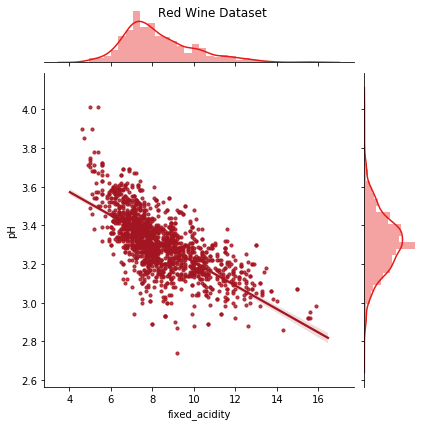

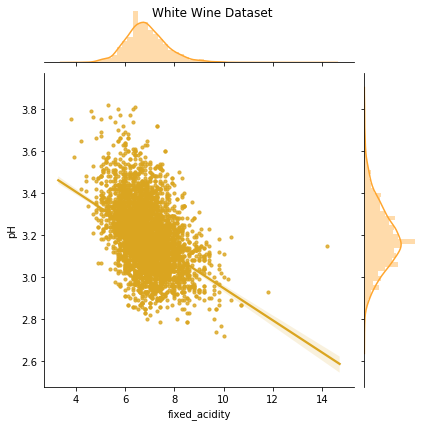

In [6]:
# check integrity of datasets based on the assumption that if pH level decrease, acidity must increase 

fixedAcidity_pH = df_red[['pH', 'fixed_acidity']]
gridA = sns.JointGrid(x="fixed_acidity", y="pH", data=fixedAcidity_pH, height=6) 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10}, color="#A31621")
gridA = gridA.plot_marginals(sns.distplot, color="#E41B17")
gridA.fig.suptitle("Red Wine Dataset")

fixedAcidity_pH_white = df_white[['pH', 'fixed_acidity']]
gridA_white = sns.JointGrid(x="fixed_acidity", y="pH", data=fixedAcidity_pH_white, height=6) 
gridA_white = gridA_white.plot_joint(sns.regplot, scatter_kws={"s": 10}, color="goldenrod")
gridA_white = gridA_white.plot_marginals(sns.distplot, color="#FFA62F") 
gridA_white.fig.suptitle("White Wine Dataset")

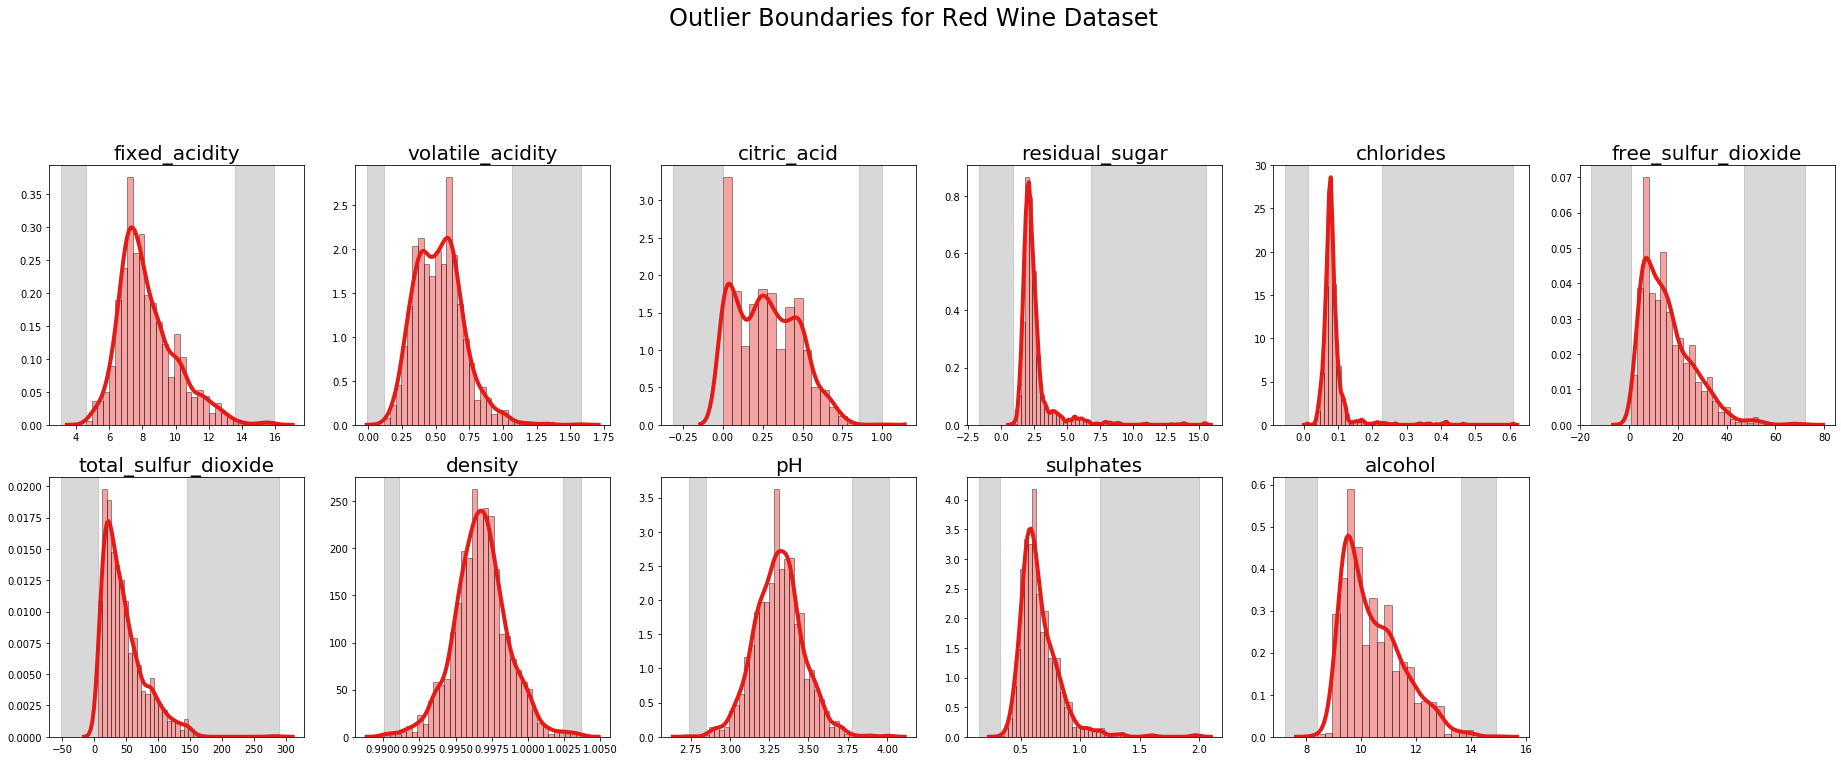

In [7]:
#outlier detection for red wine dataset using 3 standard deviations

plt.figure(figsize=(32,22))
for i, col in enumerate(df_red.columns[:-1], 1):
    feature = df_red[col]
    mean = feature.mean()
    std_3 = feature.std()*3
    lower, upper = mean-std_3,mean+std_3
    plt.subplot(4,6,i)
    p = sns.distplot(feature, hist=True, kde=True,
            color = '#E41B17', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4})
    p.set_xlabel('')
    plt.title(col,fontsize=20)    
    plt.axvspan(feature.min(),lower,color='grey',alpha=0.3)
    plt.axvspan(upper,feature.max(),color='grey',alpha=0.3)
plt.suptitle('Outlier Boundaries for Red Wine Dataset',fontsize=24)
#plt.tight_layout()
plt.show()

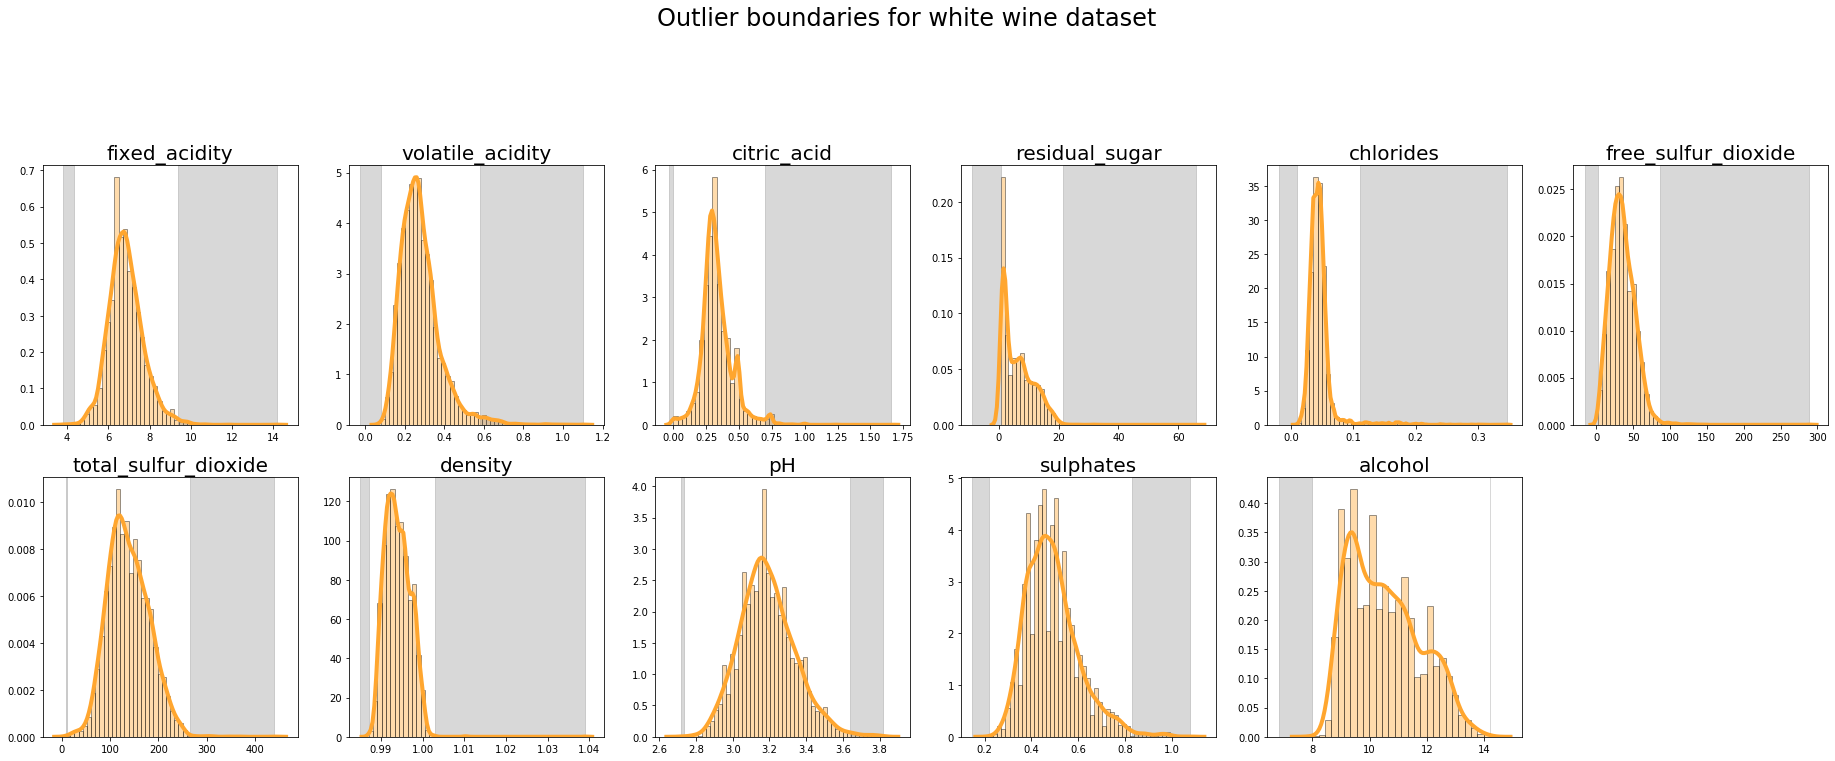

In [8]:
#outlier detection for white wine dataset using 3 standard deviations

plt.figure(figsize=(32,22))
for i, col in enumerate(df_white.columns[:-1], 1):
    feature = df_white[col]
    mean = feature.mean()
    std_3 = feature.std()*3
    lower, upper = mean-std_3,mean+std_3
    plt.subplot(4,6,i)
    p = sns.distplot(feature, hist=True, kde=True,
            color = '#FFA62F', 
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 4})
    p.set_xlabel('')
    plt.title(col,fontsize=20)    
    plt.axvspan(feature.min(),lower,color='grey',alpha=0.3)
    plt.axvspan(upper,feature.max(),color='grey',alpha=0.3)
plt.suptitle('Outlier boundaries for white wine dataset',fontsize=24)
# plt.tight_layout()
plt.show()

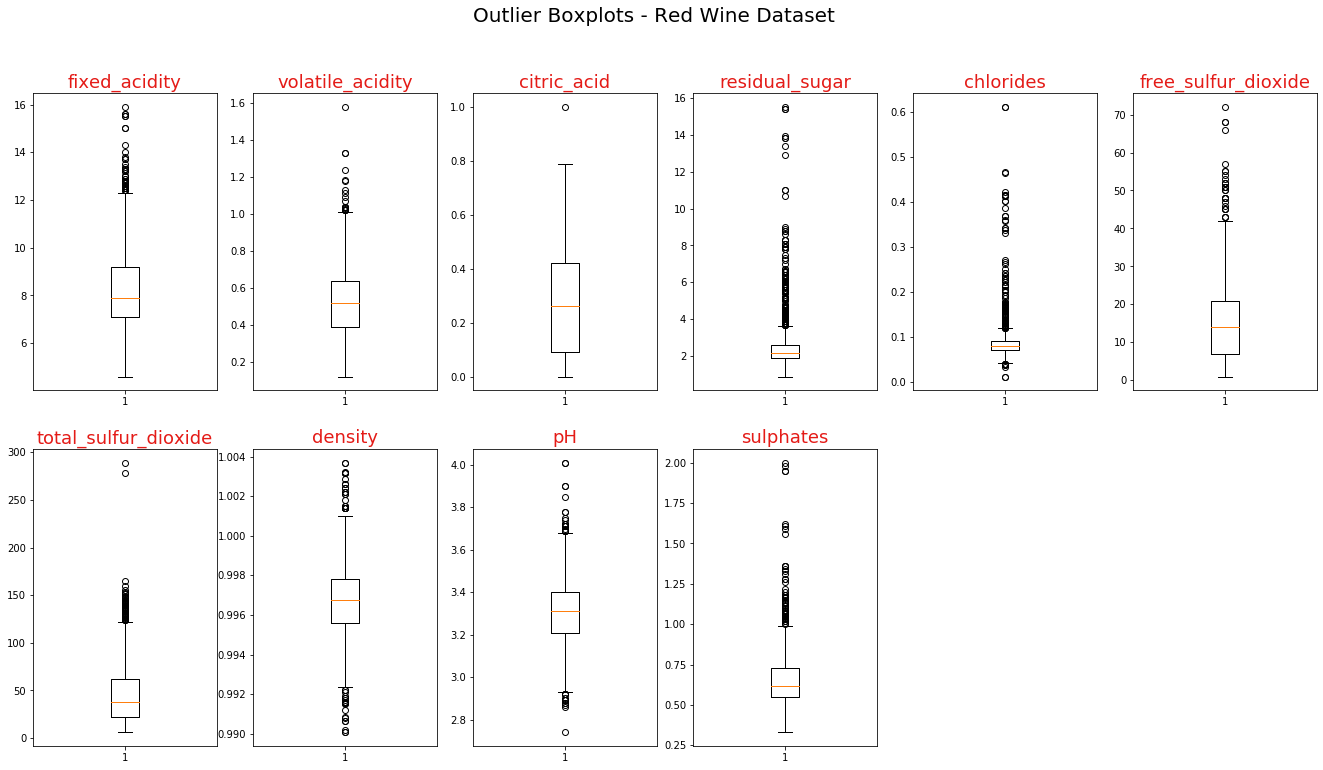

In [9]:
# boxplots of outliers for red wine dataset

plt.figure(figsize=(23,12))
plt.suptitle('Outlier Boxplots - Red Wine Dataset',fontsize=20)
for i, col in enumerate(df_red.columns[:-2], 1):
    plt.subplot(2,6,i)
    plt.boxplot(df_red[col])
    plt.title(col,fontsize=18, color='#E41B17')

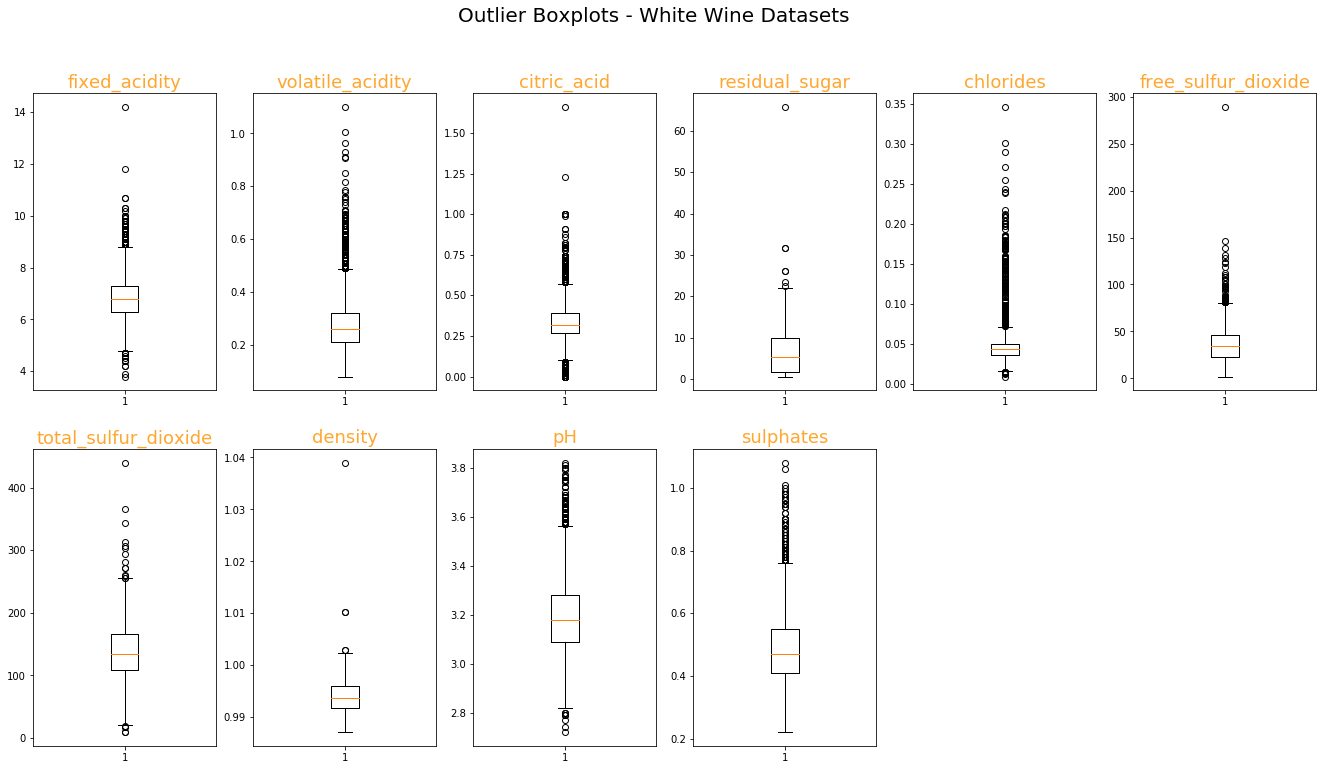

In [10]:
# boxplots of outliers for white wine dataset

plt.figure(figsize=(23,12))
plt.suptitle('Outlier Boxplots - White Wine Datasets',fontsize=20)
for i, col in enumerate(df_white.columns[:-2], 1):
    plt.subplot(2,6,i)
    plt.boxplot(df_white[col])
    plt.title(col,fontsize=18, color='#FFA62F')

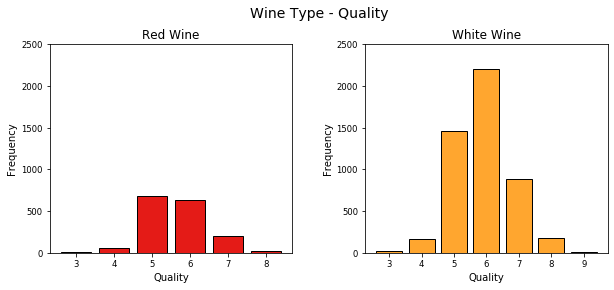

In [11]:
#check frequency of quality counts in the white wine dataframe


fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = df_red['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0,2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color= '#E41B17', 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = df_white['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0,2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='#FFA62F', 
               edgecolor='black', linewidth=1)

__Exploratory Data Analysis - Observations__ 

__Descriptive Statistics__ 
The red and white wine dataframes each contain 11 columns with the physicochemical variables, as listed in the introduction, and 1 column with the quality assignments. The red wine dataset contains 1599 instances and the white wine, 4898. There is no missing data and all attributes are numeric. Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine. Mean value of sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine. From all numbers, we can observe that there is more citric acid in white than red wines. In general, white wines has half concentrations of chlorides than red wines. Although with pH the difference seems small it is interesting to note that it is slightly higher in red wines.

__Integrity of Datasets:__
The integrity of the dataset appears to be intact based on the analysis of pH versus acidity and a decrease in acidity with an increase in pH.

__Variable Distributions and Outliers:__
For outlier detection analysis, a sample was treated as an outlier if it was 3 standard deviations from the mean.The outlier boundaries were visualised by overlaying the outlier region onto the variable distribution charts. For the red wine dataset, the pH and density appeared to each have a normal distribution. The other variable classes appear to be somewhat asymmetric (skewed right), particuarly residual sugar and alcohol, with mostly larger outliers. For the white wine dataset, the pH appeared to have a normal distribution. The other variable classes (including density) were asymmetric with a right skew, similar to the red wine dataset. To understand more about the quality assigned to the wines, the distribution of quality counts was plotted for the red and white dataframes. Quality had the most values concentrated in the categories 5,6 and 7. Only a small proportion of wines were classified in the categories 3,4, 8 and 9 and none in the categories 1, 2 and 10 for both datasets.

## Determine the Factors that Predict Wine Quality

### 1. Cross-Validation, Test/Train Dataset QC & Single Factor Analysis for Wine Quality

To address the uneven frequency of ranked qualities, the quality class will be discretized into 2 bins (<= 5 for poor quality and > 5 for good quality) with quality scores being assigned to bins of 0 (poor quality) and 1 (good quality). For now, the outliers will be retained in the datasets as physicochemical attributes will be normalised before making predictions from the data. A single factor analysis will be carried out to assess the relationship between each of the physicochemical variables and the response variable (quality bin). The data will be split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset in order to test our model’s prediction on this subset. To ensure the test/train split is balanced and does not overfit, K-Folds Cross Validation will be carried out whereby we split our data into k subsets, train on k-1 one of those subsets and leave the last subset as test data. Then, a Kolmogorov-Smirnov (K-S) goodness of fit test will be carried out as a quality control step to check the distribution of variables between test and train datasets are the same. Next, a measure of the strength of a linear relationship between each physicochemical variable and quality will be performed using Spearman's Correlation test.   

__Single Factor Analysis for Red Wine Data__

In [12]:
#Single Factor Analysis for Red Wine Dataset 

#assign quality scores to bins of 0 and 1: where 0 (=< 5) = bad quality and 1 (> 5) = good quality
df_red['qbin'] = (df_red['quality'] > 5).astype(int)

#K-Folds Cross Validation where k = 3 (the dataset will be split into two mutually exclusive parts (test and train) three times) 

# Kolmogorov–Smirnov goodness of fit carried out to check distribution of variables between test and train datasets


df_results = pd.DataFrame(columns=['cv', 'variable', 'value', 'dataset'])
df_ks = pd.DataFrame(columns=['cv', 'variable', 'ks_test', 'p_value'])

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
i = 0
for rows_train, rows_test in cv.split(df_red):
    df_train, df_test = df_red.loc[rows_train], df_red.loc[rows_test] 
    x_train = df_train.drop(columns=['quality', 'qbin'])
    x_test = df_test.drop(columns=['quality', 'qbin']) 
    y_train = df_train['qbin']
    y_test = df_test['qbin']
    for variable in x_train.columns:
        correlation_train = x_train[variable].corr(y_train, method='spearman')
        correlation_test = x_test[variable].corr(y_test, method='spearman')
        df_temp = pd.DataFrame({'cv': [i], 
                                'variable': [variable],
                                'value': [correlation_test], 
                                'dataset': ['test']
                               })
        df_results = df_results.append(df_temp)
        df_temp = pd.DataFrame({'cv': [i], 
                                'variable': [variable],
                                'value': [correlation_train], 
                                'dataset': ['train']
                               })
        df_results = df_results.append(df_temp)
        
        ks_stat, ks_pval = stats.ks_2samp(x_train[variable], x_test[variable])
        df_temp = pd.DataFrame({'cv': [i],
                               'variable': [variable],
                               'ks_test': [ks_stat],
                               'p_value': [ks_pval]
                               }) 
        df_ks = df_ks.append(df_temp)
        
    i += 1  

In [13]:
df_ks_groups = df_ks.groupby(['variable'])['p_value'].agg(['mean', 'std']).reset_index()

In [14]:
# K-S test results for red wine dataset

df_ks_groups

,variable,mean,std
0,alcohol,0.7033,0.2341
1,chlorides,0.4947,0.2583
2,citric_acid,0.9255,0.0474
3,density,0.6808,0.0618
4,fixed_acidity,0.7848,0.0851
5,free_sulfur_dioxide,0.7263,0.2705
6,pH,0.6644,0.2618
7,residual_sugar,0.6431,0.1605
8,sulphates,0.1664,0.1491
9,total_sulfur_dioxide,0.7464,0.2300


In [15]:
df_results_groups = df_results.groupby(['variable', 'dataset'])['value'].agg(['mean', 'std']).reset_index()

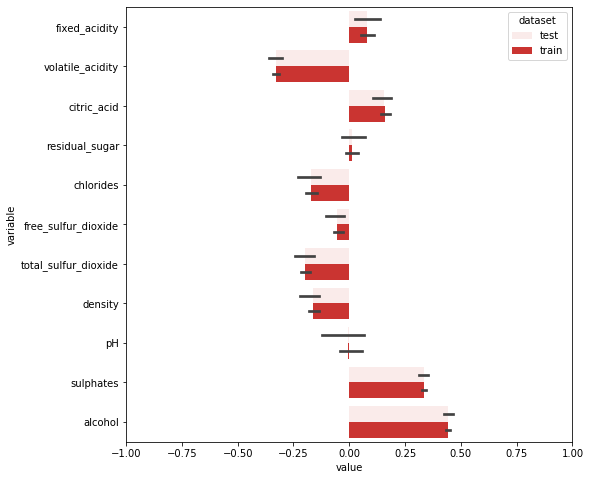

In [16]:
plt.figure(figsize=(8, 8))
plt.xlim(-1,1)
sfa_qbin = sns.barplot(x="value", y="variable", hue="dataset", data=df_results, color='#E41B17')

__Single Factor Analysis for White Wine Data__

In [17]:
#Single Factor Analysis for White Wine Data

#assign quality scores to bins of 0 and 1: where 0 (=< 5) = bad quality and 1 (> 5) = good quality
df_white['qbin'] = (df_white['quality'] > 5).astype(int)

#K-Folds Cross Validation where k = 3 (the dataset will be split into two mutually exclusive parts (test and train) three times) 

#Kolmogorov–Smirnov goodness of fit carried out to check distribution of variables between test and train datasets


df_results_w = pd.DataFrame(columns=['cv', 'variable', 'value', 'dataset'])
df_ks_w = pd.DataFrame(columns=['cv', 'variable', 'ks_test', 'p_value'])

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
i = 0
for rows_train, rows_test in cv.split(df_white):
    df_train_w, df_test_w = df_white.loc[rows_train], df_white.loc[rows_test] 
    x_train_w = df_train_w.drop(columns=['quality', 'qbin'])
    x_test_w = df_test_w.drop(columns=['quality', 'qbin']) 
    y_train_w = df_train_w['qbin']
    y_test_w = df_test_w['qbin']
    for variable in x_train_w.columns:
        correlation_train_w = x_train_w[variable].corr(y_train_w, method='spearman')
        correlation_test_w = x_test_w[variable].corr(y_test_w, method='spearman')
        df_temp_w = pd.DataFrame({'cv': [i], 
                                'variable': [variable],
                                'value': [correlation_test_w], 
                                'dataset': ['test']
                               })
        df_results_w = df_results_w.append(df_temp_w)
        df_temp_w = pd.DataFrame({'cv': [i], 
                                'variable': [variable],
                                'value': [correlation_train_w], 
                                'dataset': ['train']
                               })
        df_results_w = df_results_w.append(df_temp_w)
        
        ks_stat_w, ks_pval_w = stats.ks_2samp(x_train_w[variable], x_test_w[variable])
        df_temp_w = pd.DataFrame({'cv': [i],
                               'variable': [variable],
                               'ks_test': [ks_stat_w],
                               'p_value': [ks_pval_w]
                               }) 
        df_ks_w = df_ks_w.append(df_temp_w)
        
    i += 1 

In [18]:
df_ks_groups_w = df_ks_w.groupby(['variable'])['p_value'].agg(['mean', 'std']).reset_index()

In [19]:
# K-S test results for white wine dataset

df_ks_groups_w

,variable,mean,std
0,alcohol,0.6866,0.1195
1,chlorides,0.8440,0.1079
2,citric_acid,0.5351,0.4340
3,density,0.7003,0.2172
4,fixed_acidity,0.4584,0.4707
5,free_sulfur_dioxide,0.9106,0.1371
6,pH,0.7333,0.2036
7,residual_sugar,0.5376,0.1451
8,sulphates,0.5586,0.1978
9,total_sulfur_dioxide,0.7281,0.1133


In [20]:
df_results_groups_w = df_results_w.groupby(['variable', 'dataset'])['value'].agg(['mean', 'std']).reset_index()

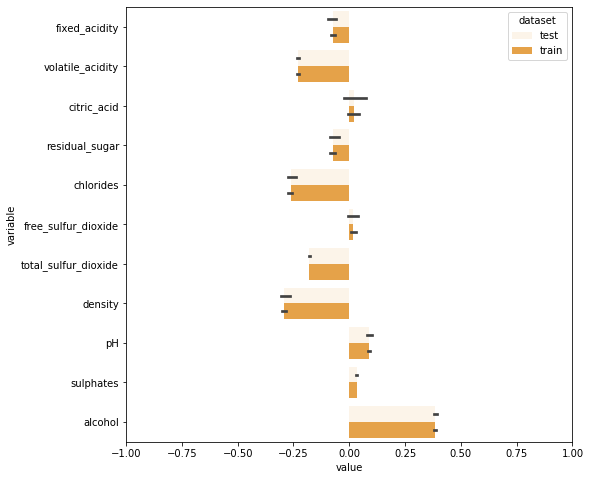

In [21]:
plt.figure(figsize=(8, 8))
plt.xlim(-1,1)
sfa_qbin_w = sns.barplot(x="value", y="variable", hue="dataset", data=df_results_w, color='#FFA62F')

__Cross-Validation, Test/Train Dataset QC & Single Factor Analysis - Observations__

__Quality Control for Test/Train Split:__ 
Based on the mean pvalues calculated using the K-S test being non-significant (> 0.05), we fail to reject the null hypothesis as the test and train datasets demonstrate the same distributions (pvalues ranging from 0.1664 to 0.9255 for the red wine dataset and 0.4442 to 0.9106 for the white wine dataset). This is an important quality control step as differences between test and train distributions can negatively affect our model and the interpretation of results. We can now move on to our analyses.  

__Single Factor Analysis:__ 
Correlation analyses were carried out between each physicochemical variable and quality for the red and white wine datasets. From the results for the red wine dataset, positive correlations with quality stood out for alcohol and sulphates. Quality was negatively correlated with volatile acidity. 
From the white wine dataset,a positive correlation with quality stood out for alcohol. Weak negative correlations stood out for volatile acidity, density and chlorides. 
Alcohol is formed as a result of yeast converting sugar during the fermentation process. The percentage of alcohol in wine affects both flavor and texture - for example wines with higher alcohol tend to taste bolder and more oily and wines with lower alcohol tend to taste lighter-bodied. Sulphates are often added during winemaking because of their antioxidant and antibacterial properties, fighting any unwanted fermentation processes that would affect and spoil the overall taste of the wine produced. 
Volatile acidity is a measure of a wines volatile acids. Excess of volatile acids are undesirable and lead to unpleasant flavor therefore it makes sense that they would be negatively correlated with quality here.  

### 2. Variable Correlations

If a number of variables are highly correlated and included in a model, it can lead to unreliable and unstable estimates of regression coefficients. We will identify correlated features using the Pearson method (for continuous data) that may cause issues during modelling.  

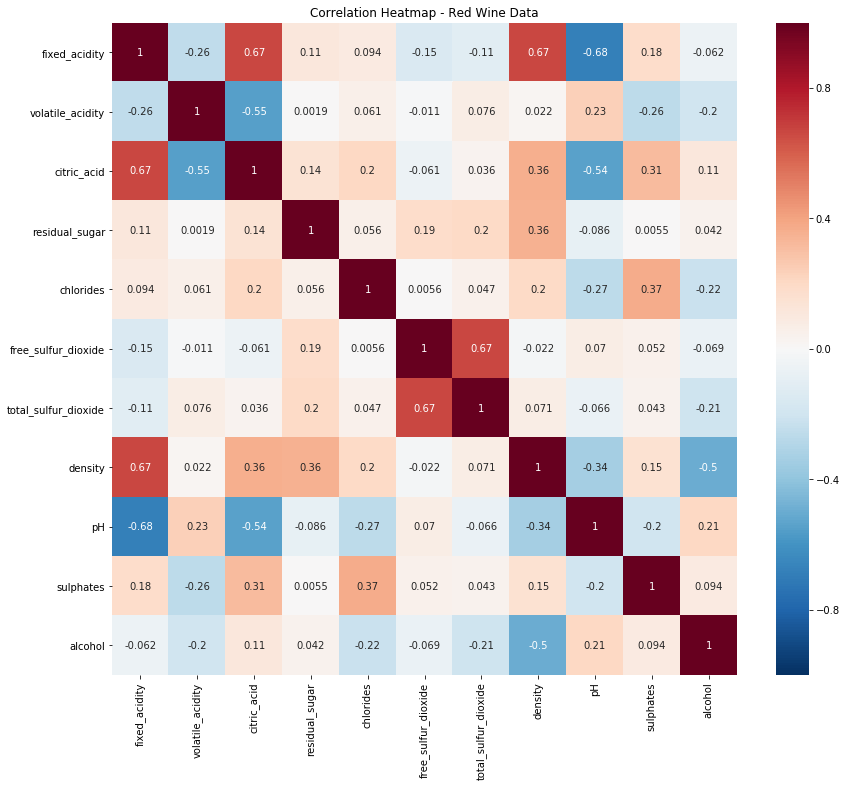

In [22]:
# Variable Correlations - Red Wine Dataset 

df_red_mc = df_red.drop(columns=['quality', 'qbin'])
correlation = df_red_mc.corr() 
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r").set_title('Correlation Heatmap - Red Wine Data')

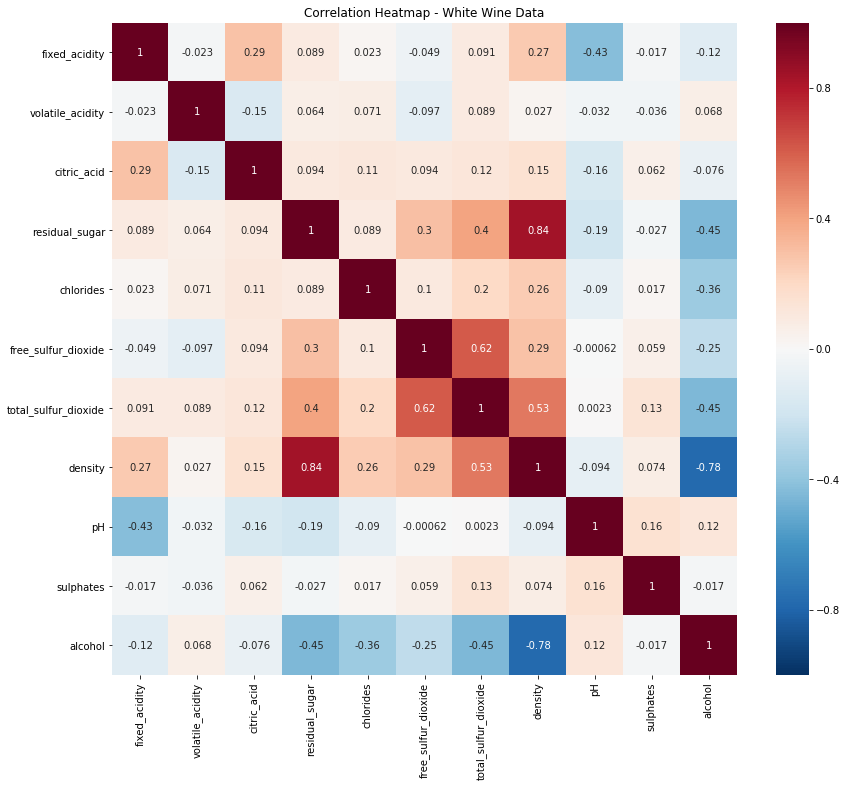

In [23]:
# Variable Correlations - White Wine Dataset 

df_white_mc = df_white.drop(columns=['quality', 'qbin'])
correlation = df_white_mc.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r").set_title('Correlation Heatmap - White Wine Data')

__Variable Correlations - Observations__

From the red wine dataset, strong positive correlations were observed between fixed acidity and citric acid, fixed acidity and density. Strong negative correlations were observed between fixed acidity and pH. 
From the white wine dataset, strong positive correlations were observed between residual sugar and density and strong negative correlations between density and alcohol. A strong positive correlation was observed between free sulphur dioxide and total sulphur dioxide in both datasets however this is expected. Due to the small number of variables in the dataset, we will retain all for now and carry out a variance inflation factor analysis after eliminating non-significant variables observed in the full model. 

### 3. Logistic Regression for Wine Quality Prediction 

A classification of our data will be carried out using a binary logistic regression model. Logistic regression is a machine learning algorithm used to assign our observations (wines) to a discrete set of classes (in this case bad quality or good quality (0 or 1)). When we pass our dataset variables (physicochemical properties of wines) through a prediction function, we can use ROC AUC (Receiver Operating Characteristic Area Under the Curve) score to return a measure of how good the model is at distinguishing between classes. A ROC curve plots the performance of a binary classifier under various threshold settings; this is measured by true positive rate and false positive rate. If the classifier predicts “true” more often, it will have more true positives but also more false positives. If the classifier is more conservative, predicting “true” less often, it will have fewer false positives but fewer true positives as well. The ROC curve is a graphical representation of this tradeoff. The AUC (Area Under the Curve) is the area enclosed by the ROC curve. Therefore an AUC of 1 means the model can perfectly separate the two classes (0 and 1) and an AUC of 0.5 means the model cannot distinguish between the two classes. 

The first logistic regression analysis will be carried out using the full model - one that includes all of the physicochemical factors for which data is available. Then we will carry out the analysis again after eliminating the variables with p-values beyond the decision threshold (>= 5 % + caution with pvalues just below 5 %). The model outputs regression coefficients for each predictor variable (physicochemical attributes) which describes the size and direction of the relationship between the predictor and the response variable (bad or good quality). Therefore the coefficient can be used to determine whether a change in a predictor variable makes the effect more likely or less likely. In other words, positive coefficients indicate that the effect becomes more likely and negative coefficients indicate that the effect becomes less likely.

__Logistic Regression for Red Wine Quality__

In [24]:
#Logistic Regression Model for red wine dataset
#cross validation - splitting the dataset into two mutually exclusive parts three times 
#so that each time a measurement is made, we can test it on unseen data


df_logistic_results = pd.DataFrame(columns=['col', 'coef', 'pval']) 
scores = []

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
for rows_train, rows_test in cv.split(df_red):
    df_train, df_test = df_red.loc[rows_train], df_red.loc[rows_test] 
    x_train = df_train.drop(columns=['quality', 'qbin'])
    x_test = df_test.drop(columns=['quality', 'qbin']) 
    y_train = df_train['qbin']
    y_test = df_test['qbin']

    #Standardize features by removing the mean and scaling to unit variance
    #The standard score of a sample x is calculated as:
    #z = (x - u) / s
    #where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
    #important to learn mean and SD on trained dataset and we use them to scale the test dataset

    sc = StandardScaler()
    sc.fit(x_train)
    x_train = pd.DataFrame(sc.transform(x_train), columns=x_train.columns, index=x_train.index)
    x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns, index=x_test.index)

    x_train = sm.add_constant(x_train)
    x_test = sm.add_constant(x_test)
    lr = sm.Logit(y_train, x_train).fit()
    
    df_temp = pd.DataFrame({'col': x_train.columns, 'coef': lr.params, 'pval': lr.pvalues})
    
    df_logistic_results = df_logistic_results.append(df_temp) 
    score = roc_auc_score(y_test, lr.predict(x_test))
    scores.append(score)

print(np.mean(scores))

Optimization terminated successfully.
         Current function value: 0.523481
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507255
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.514208
         Iterations 6
0.8123002667700859


/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
#group results 

df_logistic_groups = (df_logistic_results
                      .groupby(['col'])[['coef', 'pval']]
                      .agg(['mean', 'std', 'min', 'max'])
                      .reset_index()
                     )

In [26]:
#inspect results

df_logistic_groups

col    coef                          pval                \
                            mean    std     min     max   mean    std    min   
0                alcohol  0.9294 0.0207  0.9148  0.9530 0.0000 0.0000 0.0000   
1              chlorides -0.1884 0.0353 -0.2246 -0.1541 0.0473 0.0354 0.0135   
2            citric_acid -0.2590 0.0707 -0.3313 -0.1901 0.0754 0.0721 0.0175   
3                  const  0.2413 0.0363  0.2001  0.2684 0.0031 0.0041 0.0005   
4                density -0.0943 0.0803 -0.1864 -0.0389 0.6443 0.2628 0.3436   
5          fixed_acidity  0.2434 0.0808  0.1858  0.3357 0.2696 0.1282 0.1257   
6    free_sulfur_dioxide  0.2327 0.0344  0.1933  0.2566 0.0336 0.0242 0.0179   
7                     pH -0.0606 0.1354 -0.1949  0.0759 0.4597 0.2589 0.1637   
8         residual_sugar  0.0814 0.1121 -0.0480  0.1483 0.2867 0.2834 0.1121   
9              sulphates  0.4795 0.0635  0.4125  0.5388 0.0000 0.0000 0.0000   
10  total_sulfur_dioxide -0.5455 0.0757 -0.6323 -0.4938 0.0000 0.0000 0.0000   
11      volatile_acidity -0.5890 0.0575 -0.6285 -0.5231 0.0000 0.0000 0.0000   

           
      max  
0  0.0000  
1  0.0842  
2  0.1562  
3  0.0079  
4  0.8300  
5  0.3717  
6  0.0615  
7  0.6437  
8  0.6136  
9  0.0000  
10 0.0000  
11 0.0000

__Variance Inflation Factor Analysis__ 

Variance Inflation Factor (VIF) is a measure of collinearity among predictor variables within a multiple regression. It is may be calculated for each predictor by doing a linear regression of one predictor on all the other predictors, and then obtaining the R2 from that regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variance of a single beta if it were fit alone [1/(1-R2)]. There is no gold standard on how high the VIF has to be to constitute a problem, however a factor > 10 is commonly used.

In [27]:
#filter out columns based on a pvalue < 0.03 

col_filtered = df_logistic_groups.loc[df_logistic_groups[('pval', 'mean')] < 0.03, 'col'].values

In [28]:
# remove 'const' from our column list
col_vif = [x for x in col_filtered if x != 'const']

# carry out variance inflation factor calculation:

for i, col in enumerate(col_vif):
    v = variance_inflation_factor(np.matrix(df_red[col_vif]), i)
    print(col, v)


alcohol 23.613207242624757
sulphates 15.416075404396459
total_sulfur_dioxide 2.962232539938884
volatile_acidity 8.392670790674778


__Variance Inflation Factor - Observations__ 

Although  alcohol and sulphates have high VIFs and we need to be cautious about their impact, these factors were correlated with quality in our previous analysis. Future work could investigate paired interactions between the final four variables.

In [29]:
#Logistic Regression model on filtered Red Wine dataset

#cross validation - splitting the dataset into two mutually exclusive parts three times 
#so that each time a measurement is made, we can test it on unseen data


df_logistic_results = pd.DataFrame(columns=['col', 'coef', 'pval']) 
scores = []

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
for rows_train, rows_test in cv.split(df_red):
    col_filtered = df_logistic_groups.loc[(df_logistic_groups[('pval', 'mean')] < 0.03)&(df_logistic_groups['col'] !='const'), 'col'].values

    df_train, df_test = df_red.loc[rows_train], df_red.loc[rows_test] 
    x_train = df_train.drop(columns=['quality', 'qbin'])[col_filtered]
    x_test = df_test.drop(columns=['quality', 'qbin'])[col_filtered]
    y_train = df_train['qbin']
    y_test = df_test['qbin']
    
    #Standardize features by removing the mean and scaling to unit variance
    #The standard score of a sample x is calculated as:
    #z = (x - u) / s
    #where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
    #important to learn mean and SD on trained dataset and we use them to scale the test dataset

    sc = StandardScaler()
    sc.fit(x_train)
    x_train = pd.DataFrame(sc.transform(x_train), columns=x_train.columns, index=x_train.index)
    x_test = pd.DataFrame(sc.transform(x_test), columns=x_test.columns, index=x_test.index)

    x_train = sm.add_constant(x_train)
    x_test = sm.add_constant(x_test)
    lr = sm.Logit(y_train, x_train).fit()
    
    df_temp = pd.DataFrame({'col': x_train.columns, 'coef': lr.params, 'pval': lr.pvalues})
    
    df_logistic_results = df_logistic_results.append(df_temp) 
    score = roc_auc_score(y_test, lr.predict(x_test))
    scores.append(score)

print(np.mean(scores))

Optimization terminated successfully.
         Current function value: 0.532082
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.520382
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.526184
         Iterations 6
0.8113559431119498


/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
df_logistics_groups = (df_logistic_results
                      .groupby(['col'])[['coef', 'pval']]
                      .agg(['mean', 'std', 'min', 'max'])
                      .reset_index()
                     )

In [31]:
df_logistics_groups

col    coef                          pval                \
                           mean    std     min     max   mean    std    min   
0               alcohol  0.9887 0.0280  0.9602  1.0161 0.0000 0.0000 0.0000   
1                 const  0.2454 0.0362  0.2062  0.2774 0.0022 0.0029 0.0002   
2             sulphates  0.3479 0.0421  0.2994  0.3742 0.0000 0.0000 0.0000   
3  total_sulfur_dioxide -0.3966 0.0615 -0.4669 -0.3526 0.0000 0.0000 0.0000   
4      volatile_acidity -0.5538 0.0501 -0.6062 -0.5064 0.0000 0.0000 0.0000   

          
     max  
0 0.0000  
1 0.0055  
2 0.0001  
3 0.0000  
4 0.0000

__Logistic Regression for White Wine Quality__

In [32]:
#Logistic Regression Model - White Wine Dataset
#cross validation - splitting the dataset into two mutually exclusive parts three times 
#so that each time a measurement is made, we can test it on unseen data

df_logistic_results_w = pd.DataFrame(columns=['col', 'coef', 'pval']) 
scores = []

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
for rows_train_w, rows_test_w in cv.split(df_white):
    df_train_w, df_test_w = df_white.loc[rows_train_w], df_white.loc[rows_test_w] 
    x_train_w = df_train_w.drop(columns=['quality', 'qbin'])
    x_test_w = df_test_w.drop(columns=['quality', 'qbin']) 
    y_train_w = df_train_w['qbin']
    y_test_w = df_test_w['qbin']

    #Standardize features by removing the mean and scaling to unit variance
    #The standard score of a sample x is calculated as:
    #z = (x - u) / s
    #where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
    #important to learn mean and SD on trained dataset and we use them to scale the test dataset

    sc = StandardScaler()
    sc.fit(x_train_w)
    x_train_w = pd.DataFrame(sc.transform(x_train_w), columns=x_train_w.columns, index=x_train_w.index)
    x_test_w = pd.DataFrame(sc.transform(x_test_w), columns=x_test_w.columns, index=x_test_w.index)

    x_train_w = sm.add_constant(x_train_w)
    x_test_w = sm.add_constant(x_test_w)
    lr = sm.Logit(y_train_w, x_train_w).fit()
    
    df_temp_w = pd.DataFrame({'col': x_train_w.columns, 'coef': lr.params, 'pval': lr.pvalues})
    
    df_logistic_results_w = df_logistic_results_w.append(df_temp_w) 
    score = roc_auc_score(y_test_w, lr.predict(x_test_w))
    scores.append(score)

print(np.mean(scores))

/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.504297
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.500263
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504402
         Iterations 6
0.7990029809831221


/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [33]:
df_logistic_groups_w = (df_logistic_results_w
                      .groupby(['col'])[['coef', 'pval']]
                      .agg(['mean', 'std', 'min', 'max'])
                      .reset_index()
                     )

In [34]:
df_logistic_groups_w

col    coef                          pval                \
                            mean    std     min     max   mean    std    min   
0                alcohol  0.9146 0.0319  0.8794  0.9415 0.0000 0.0000 0.0000   
1              chlorides  0.0188 0.0183 -0.0019  0.0326 0.6644 0.2639 0.4757   
2            citric_acid  0.0141 0.0589 -0.0516  0.0619 0.2988 0.1565 0.1753   
3                  const  0.9220 0.0121  0.9130  0.9357 0.0000 0.0000 0.0000   
4                density -0.8092 0.1096 -0.9059 -0.6901 0.0033 0.0038 0.0007   
5          fixed_acidity  0.0317 0.0130  0.0230  0.0466 0.6722 0.1256 0.5276   
6    free_sulfur_dioxide  0.1648 0.0880  0.1117  0.2663 0.0319 0.0282 0.0000   
7                     pH  0.1644 0.0236  0.1404  0.1876 0.0178 0.0145 0.0052   
8         residual_sugar  0.8609 0.0695  0.7809  0.9060 0.0000 0.0000 0.0000   
9              sulphates  0.2058 0.0194  0.1934  0.2281 0.0001 0.0001 0.0000   
10  total_sulfur_dioxide -0.0581 0.0690 -0.1378 -0.0169 0.5243 0.4281 0.0303   
11      volatile_acidity -0.6513 0.0246 -0.6668 -0.6229 0.0000 0.0000 0.0000   

           
      max  
0  0.0000  
1  0.9659  
2  0.4748  
3  0.0000  
4  0.0077  
5  0.7554  
6  0.0534  
7  0.0337  
8  0.0000  
9  0.0001  
10 0.7890  
11 0.0000

In [35]:
#filter the white wine dataset to exclude variables with a pvalue of < 0.03

col_filtered_w = df_logistic_groups_w.loc[df_logistic_groups_w[('pval', 'mean')] < 0.03, 'col'].values

In [36]:
#inspect filtered white wine dataset
col_filtered_w

array(['alcohol', 'const', 'density', 'pH', 'residual_sugar', 'sulphates',
       'volatile_acidity'], dtype=object)

__Variance Inflation Factor Analysis__ 

In [37]:
# remove 'const' from our column list
col_vif_w = [x for x in col_filtered_w if x != 'const']

# carry out variance inflation factor calculation:

for i, col in enumerate(col_vif_w):
    v = variance_inflation_factor(np.matrix(df_white[col_vif_w]), i)
    print(col, v)

alcohol 92.03319071599415
density 565.656974662514
pH 481.23659027623137
residual_sugar 3.467180094161593
sulphates 19.969213806428534
volatile_acidity 8.775394718829135


__Variance Inflation Factor Analysis - Observations__

Due to the extremely high VIFs for density and pH they will be removed in the next model. Alcohol and sulphates will be retained for now but the result will be interpreted with caution. Future work can focus on paired interaction analysis to gain a better understanding of how variables are interacting. 

In [38]:
#Logistic Regression Model on filtered White Wine Dataset
#cross validation - splitting the dataset into two mutually exclusive parts three times 
#so that each time a measurement is made, we can test it on unseen data

#cross validation - splitting the dataset into two mutually exclusive parts three times 
#so that each time a measurement is made, we can test it on unseen data


df_logistic_results_w = pd.DataFrame(columns=['col', 'coef', 'pval']) 
scores = []

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
for rows_train_w, rows_test_w in cv.split(df_white):
    col_filtered_w = df_logistic_groups_w.loc[(df_logistic_groups_w[('pval', 'mean')] < 0.03)&(df_logistic_groups_w['col'] != 'const')&(df_logistic_groups_w['col'] != 'density')&(df_logistic_groups_w['col'] != 'pH'), 'col'].values

    df_train_w, df_test_w = df_white.loc[rows_train_w], df_white.loc[rows_test_w] 
    x_train_w = df_train_w.drop(columns=['quality', 'qbin'])[col_filtered_w]
    x_test_w = df_test_w.drop(columns=['quality', 'qbin'])[col_filtered_w]
    y_train_w = df_train_w['qbin']
    y_test_w = df_test_w['qbin']
    
    #Standardize features by removing the mean and scaling to unit variance
    #The standard score of a sample x is calculated as:
    #z = (x - u) / s
    #where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
    #important to learn mean and SD on trained dataset and we use them to scale the test dataset

    sc = StandardScaler()
    sc.fit(x_train_w)
    x_train_w = pd.DataFrame(sc.transform(x_train_w), columns=x_train_w.columns, index=x_train_w.index)
    x_test_w = pd.DataFrame(sc.transform(x_test_w), columns=x_test_w.columns, index=x_test_w.index)

    x_train_w = sm.add_constant(x_train_w)
    x_test_w = sm.add_constant(x_test_w)
    lr = sm.Logit(y_train_w, x_train_w).fit()
    
    df_temp_w = pd.DataFrame({'col': x_train_w.columns, 'coef': lr.params, 'pval': lr.pvalues})
    
    df_logistic_results_w = df_logistic_results_w.append(df_temp_w) 
    score = roc_auc_score(y_test_w, lr.predict(x_test_w))
    scores.append(score)

print(np.mean(scores))

Optimization terminated successfully.
         Current function value: 0.510256
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.505471
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512869
         Iterations 6
0.7938925858825834


/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
df_logistic_groups_w = (df_logistic_results_w
                      .groupby(['col'])[['coef', 'pval']]
                      .agg(['mean', 'std', 'min', 'max'])
                      .reset_index()
                     )

In [40]:
df_logistic_groups_w

col    coef                          pval                     
                       mean    std     min     max   mean    std    min    max
0           alcohol  1.3010 0.0428  1.2654  1.3485 0.0000 0.0000 0.0000 0.0000
1             const  0.9037 0.0130  0.8952  0.9187 0.0000 0.0000 0.0000 0.0000
2    residual_sugar  0.3701 0.0246  0.3501  0.3976 0.0000 0.0000 0.0000 0.0000
3         sulphates  0.1566 0.0166  0.1389  0.1718 0.0010 0.0011 0.0002 0.0023
4  volatile_acidity -0.6843 0.0161 -0.6956 -0.6659 0.0000 0.0000 0.0000 0.0000

__Logistic Regression for Wine Qualiy Prediction - Observations__

The following are the ROC AUC scores for predicting wine quality from both datasets: 

__Red Wine__ 
<br>
Final Model: 0.81

__White Wine__
<br>
Final Model: 0.79

Based on our ROC AUC scores (0.81 for red wine and 0.79 for white wine quality prediction), we can conclude that our model does a moderately good job of distinguishing between the poor and good quality wines. Ratings of wine quality based on personal taste introduce a certain degree of subjectivity therefore an excellent ROC AUC score (> 0.9) would not be expected here. Additionally, the wine experts may be taking into account other non-physicochemical attributes that are not present in the datasets. A distinct advantage of using logistic regression for a classification task, as opposed to other models, is the interpretability of the output. Based on the model outputs, we can examine what are good predictors of wine quality and at what levels. For red wine, we can see from our regression coefficients that alcohol and sulphates are positive predictors of a good quality wine and that volatile acidity and total sulphur dioxide are negative predictors. For white wine, we can see from our regression coefficients that alcohol, residual sugar, pH and sulphates are positive predictors of a good quality wine and that volatile acidity is a negative predictor of a good quality wine.

## Determine the Chemical Properties that Predict Wine Type


In [41]:
#add new column - type - to red wine dataframe where red wine = 1
df_red['type'] = 1 

#add new column - type - to white wine dataframe where white wine = 0 

df_white['type'] = 0  

#concatenate the datasets 
frames = [df_red, df_white]
df_both = pd.concat(frames).reset_index(drop=True)

#drop 'quality' and 'qbin' columns 
df_both = df_both.drop(columns=['quality', 'qbin'])

### 1. Single Factor Analysis for Wine Type

In [42]:
#Single Factor Anaysis for Wine Type

#K-Folds Cross Validation where k = 3 (the dataset will be split into two mutually exclusive parts (test and train) three times) 

#Kolmogorov–Smirnov goodness of fit carried out to check distribution of variables between test and train datasets


df_results_both = pd.DataFrame(columns=['cv', 'variable', 'value', 'dataset'])
df_ks_both = pd.DataFrame(columns=['cv', 'variable', 'ks_test', 'p_value'])

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
i = 0
for rows_train, rows_test in cv.split(df_both):
    df_train_both, df_test_both = df_both.loc[rows_train], df_both.loc[rows_test] 
    x_train_both = df_train_both.drop(columns=['type'])
    x_test_both = df_test_both.drop(columns=['type']) 
    y_train_both = df_train_both['type']
    y_test_both = df_test_both['type']
    for variable in x_train_both.columns:
        correlation_train_both = x_train_both[variable].corr(y_train_both, method='spearman')
        correlation_test_both = x_test_both[variable].corr(y_test_both, method='spearman')
        df_temp_both = pd.DataFrame({'cv': [i], 
                                'variable': [variable],
                                'value': [correlation_test_both], 
                                'dataset': ['test']
                               })
        df_results_both = df_results_both.append(df_temp_both)
        df_temp_both = pd.DataFrame({'cv': [i], 
                                'variable': [variable],
                                'value': [correlation_train_both], 
                                'dataset': ['train']
                               })
        df_results_both = df_results_both.append(df_temp_both)
        
        ks_stat_both, ks_pval_both = stats.ks_2samp(x_train_both[variable], x_test_both[variable])
        df_temp_both = pd.DataFrame({'cv': [i],
                               'variable': [variable],
                               'ks_test': [ks_stat_both],
                               'p_value': [ks_pval_both]
                               }) 
        df_ks_both = df_ks_both.append(df_temp_both)
        
    i += 1 

In [43]:
df_ks_both_groups = df_ks_both.groupby(['variable'])['p_value'].agg(['mean', 'std']).reset_index()

In [44]:
df_ks_both_groups

,variable,mean,std
0,alcohol,0.6761,0.3005
1,chlorides,0.6363,0.1285
2,citric_acid,0.7232,0.3764
3,density,0.5142,0.3794
4,fixed_acidity,0.6030,0.1218
5,free_sulfur_dioxide,0.1451,0.1547
6,pH,0.4977,0.3854
7,residual_sugar,0.3387,0.2956
8,sulphates,0.7372,0.2491
9,total_sulfur_dioxide,0.5758,0.2269


In [45]:
df_results_both_groups = df_results_both.groupby(['variable', 'dataset'])['value'].agg(['mean', 'std']).reset_index()

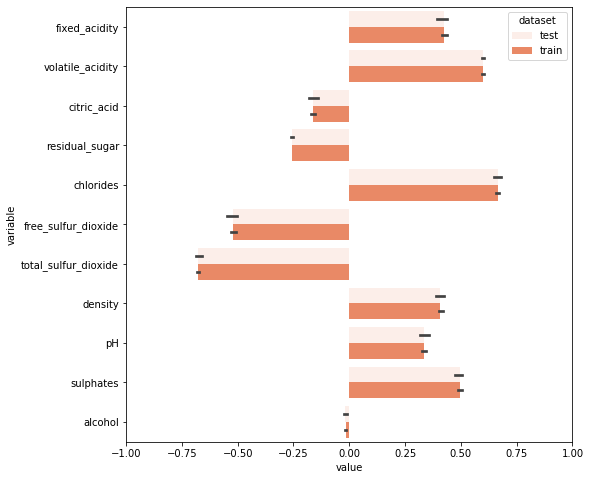

In [46]:
plt.figure(figsize=(8, 8))
plt.xlim(-1,1)
sfa_type = sns.barplot(x="value", y="variable", hue="dataset", data=df_results_both, color='coral')

__Wine Type: Single Factor Analysis - Observations__

__Quality Control for Test/Train Split:__ 
Based on the mean pvalues calculated using the K-S test being non-significant (> 0.05), we fail to reject the null hypothesis and confirm that the test and train datasets demonstrate the same distributions, with pvalues ranging from 0.14 to 0.73.

__Single Factor Analysis:__ 
A correlation analysis was carried out between each physicochemical variable and wine type (red or white). Our analysis produced positive correlations between a red wine type and fixed acidity, volatile acidity, chlorides, density, pH and sulphates. Negative correlations between a red wine type and citric acid, residual sugar, free sulphur dioxide and total sulphur dioxide were apparent. The inverse holds true for a white wine type. 

### 2. Logistic Regression for Predicting Wine Type

In [47]:
#Logistic Regression Model for Predicting Wine Type

#cross validation 

df_logistic_results_both = pd.DataFrame(columns=['col', 'coef', 'pval']) 
scores = []

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
for rows_train_both, rows_test_both in cv.split(df_both):
    df_train_both, df_test_both = df_both.loc[rows_train_both], df_both.loc[rows_test_both] 
    x_train_both = df_train_both.drop(columns=['type'])
    x_test_both = df_test_both.drop(columns=['type']) 
    y_train_both = df_train_both['type']
    y_test_both = df_test_both['type']

    #Standardize features by removing the mean and scaling to unit variance
    #The standard score of a sample x is calculated as:
    #z = (x - u) / s
    #where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
    #important to learn mean and SD on trained dataset and we use them to scale the test dataset

    sc = StandardScaler()
    sc.fit(x_train_both)
    x_train_both = pd.DataFrame(sc.transform(x_train_both), columns=x_train_both.columns, index=x_train_both.index)
    x_test_both = pd.DataFrame(sc.transform(x_test_both), columns=x_test_both.columns, index=x_test_both.index)

    x_train_both = sm.add_constant(x_train_both)
    x_test_both = sm.add_constant(x_test_both)
    lr = sm.Logit(y_train_both, x_train_both).fit()
    
    df_temp_both = pd.DataFrame({'col': x_train_both.columns, 'coef': lr.params, 'pval': lr.pvalues})
    
    df_logistic_results_both = df_logistic_results_both.append(df_temp_both) 
    score = roc_auc_score(y_test_both, lr.predict(x_test_both))
    scores.append(score)

print(np.mean(scores))

Optimization terminated successfully.
         Current function value: 0.033921
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.034604
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.025738
         Iterations 11
0.995716326274366


/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
df_logistic_groups_both = (df_logistic_results_both
                      .groupby(['col'])[['coef', 'pval']]
                      .agg(['mean', 'std', 'min', 'max'])
                      .reset_index()
                     )

In [49]:
df_logistic_groups_both

col    coef                          pval                \
                            mean    std     min     max   mean    std    min   
0                alcohol  2.3359 0.8172  1.8083  3.2773 0.0000 0.0000 0.0000   
1              chlorides  0.8838 0.2032  0.7217  1.1118 0.0000 0.0000 0.0000   
2            citric_acid -0.3599 0.1162 -0.4908 -0.2688 0.1379 0.1211 0.0121   
3                  const -4.4023 0.2886 -4.7073 -4.1335 0.0000 0.0000 0.0000   
4                density  5.5735 1.7667  4.2541  7.5806 0.0000 0.0000 0.0000   
5          fixed_acidity -0.4415 0.9713 -1.5610  0.1773 0.4987 0.4468 0.0001   
6    free_sulfur_dioxide  1.2184 0.0999  1.1058  1.2963 0.0008 0.0014 0.0000   
7                     pH -0.2359 0.5958 -0.9176  0.1853 0.4689 0.4628 0.0029   
8         residual_sugar -4.7113 0.5612 -5.1163 -4.0707 0.0000 0.0000 0.0000   
9              sulphates  0.5333 0.1057  0.4500  0.6522 0.0375 0.0467 0.0035   
10  total_sulfur_dioxide -3.1459 0.1675 -3.2994 -2.9672 0.0000 0.0000 0.0000   
11      volatile_acidity  1.0976 0.2017  0.9759  1.3304 0.0000 0.0000 0.0000   

           
      max  
0  0.0000  
1  0.0000  
2  0.2538  
3  0.0000  
4  0.0000  
5  0.8626  
6  0.0023  
7  0.9285  
8  0.0000  
9  0.0907  
10 0.0000  
11 0.0000

In [50]:
col_filtered_both = df_logistic_groups_both.loc[df_logistic_groups_both[('pval', 'mean')] < 0.03, 'col'].values

In [51]:
col_filtered_both

array(['alcohol', 'chlorides', 'const', 'density', 'free_sulfur_dioxide',
       'residual_sugar', 'total_sulfur_dioxide', 'volatile_acidity'],
      dtype=object)

__Variance Inflation Factor Analysis__

In [52]:
# remove 'const' from our column list
col_vif_both = [x for x in col_filtered_both if x != 'const']

# carry out variance inflation factor calculation:

for i, col in enumerate(col_vif_both):
    v = variance_inflation_factor(np.matrix(df_both[col_vif_both]), i)
    print(col, v)

alcohol 102.79991086666847
chlorides 4.816718163671166
density 157.4469062133381
free_sulfur_dioxide 8.376489962434947
residual_sugar 3.3934297743494457
total_sulfur_dioxide 13.510075037013909
volatile_acidity 7.087371392195566


__Variance Inflation Factor Analysis - Observations__

Alcohol and density have extremely high vifs. They will be removed from the model in the next step. 

In [53]:
#Logistic Regression Model for Wine Type

#cross validation 

df_logistic_results_bothfiltered = pd.DataFrame(columns=['col', 'coef', 'pval']) 
scores = []

list_of_cols = ['const', 'alcohol', 'density']
cond = (df_logistic_groups_both[('pval', 'mean')] < 0.03)
cond &= ~df_logistic_groups_both['col'].isin(list_of_cols)

cv = KFold(n_splits=3, shuffle=True, random_state=90210)
for rows_train_both, rows_test_both in cv.split(df_both):
    
    col_filtered_both = df_logistic_groups_both.loc[cond, 'col'].values

    
    df_train_both, df_test_both = df_both.loc[rows_train_both], df_both.loc[rows_test_both] 
    x_train_both = df_train_both.drop(columns=['type'])[col_filtered_both]
    x_test_both = df_test_both.drop(columns=['type'])[col_filtered_both] 
    y_train_both = df_train_both['type']
    y_test_both = df_test_both['type']

    #Standardize features by removing the mean and scaling to unit variance
    #The standard score of a sample x is calculated as:
    #z = (x - u) / s
    #where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
    #important to learn mean and SD on trained dataset and we use them to scale the test dataset

    sc = StandardScaler()
    sc.fit(x_train_both)
    x_train_both = pd.DataFrame(sc.transform(x_train_both), columns=x_train_both.columns, index=x_train_both.index)
    x_test_both = pd.DataFrame(sc.transform(x_test_both), columns=x_test_both.columns, index=x_test_both.index)

    x_train_both = sm.add_constant(x_train_both)
    x_test_both = sm.add_constant(x_test_both)
    lr = sm.Logit(y_train_both, x_train_both).fit()
    
    df_temp_both = pd.DataFrame({'col': x_train_both.columns, 'coef': lr.params, 'pval': lr.pvalues})
    
    df_logistic_results_bothfiltered = df_logistic_results_bothfiltered.append(df_temp_both) 
    score = roc_auc_score(y_test_both, lr.predict(x_test_both))
    scores.append(score)

print(np.mean(scores))

Optimization terminated successfully.
         Current function value: 0.087654
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.096339
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.093996
         Iterations 10
0.9910769061981136


/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/sc/bin/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [54]:
df_logistic_groups_bothfiltered = (df_logistic_results_bothfiltered
                      .groupby(['col'])[['coef', 'pval']]
                      .agg(['mean', 'std', 'min', 'max'])
                      .reset_index()
                     )

In [55]:
df_logistic_groups_bothfiltered

col    coef                          pval                \
                           mean    std     min     max   mean    std    min   
0             chlorides  1.4139 0.1353  1.3005  1.5637 0.0000 0.0000 0.0000   
1                 const -3.9320 0.1720 -4.1305 -3.8274 0.0000 0.0000 0.0000   
2   free_sulfur_dioxide  0.7743 0.1432  0.6203  0.9034 0.0001 0.0002 0.0000   
3        residual_sugar -0.8940 0.0963 -0.9993 -0.8105 0.0000 0.0000 0.0000   
4  total_sulfur_dioxide -4.0236 0.1380 -4.1823 -3.9316 0.0000 0.0000 0.0000   
5      volatile_acidity  2.0059 0.0665  1.9438  2.0760 0.0000 0.0000 0.0000   

          
     max  
0 0.0000  
1 0.0000  
2 0.0004  
3 0.0000  
4 0.0000  
5 0.0000

__Logistic Regression for Wine Type Prediction - Observations__

The ROC AUC score for predicting wine type from our concatenated dataset is 0.99 which represents an excellent result. We can conclude that our model does a good job of distinguishing between a red wine and a white wine type. From the regression coefficients, we can see that alcohol, chlorides, density, free sulphur dioxide and volatile acidity are positive predictors for a red wine type. Conversely, residual sugar and total sulphur dioxide are negative preditors. Therefore the inverse holds true for a white wine type as this is a binary classification.  